## Base












In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
%%writefile SALAS2022AprLastversion.cpp
      #include <fstream> //読み込み
      #include <iostream> // cout, endl, cin
      #include <string> // string, to_string, stoi：＠；ｐ」・；：；：＠ｐ」・：＠；ｐ」・；：；：＠ｐ」・
      #include <vector> // vector
      #include <algorithm> // min, max, swap, sort, reverse, lower_bound, upper_bound
      #include <utility> // pair, make_pair
      #include <tuple> // tuple, make_tuple
      #include <cstdint> // int64_t, int*_t
      #include <cstdio> // printf
      #include <map> // map
      #include <queue> // queue, priority_queue
      #include <set> // set
      #include <numeric>
      #include <iterator>
      #include <random> 
      #include <stack> // stack
      #include <deque> // deque
      #include <unordered_map> // unordered_map
      #include <unordered_set> // unordered_set
      #include <bitset> // bitset
      #include <cctype> // isupper, islower, isdigit, toupper, tolower


      //時間取得
      #include <chrono>
      #include <sys/time.h>
      #include <ctime>
      #include <iomanip>
      using namespace std;

#define lli long long int
#define rep(i, n) ;for (int i = 0;i < (int)(n);i++)
#define rep2(i, s, n) ;for (int i = s; i < (int)(n);i++)
#define ALL(vec)  (vec).begin(),(vec).end()
#define pi 3.1415926535897932384626433832795
#define MAX_INF 9223372036854775807
#define MIN_INF (9223372036854775807+1)
#define sosuu 1000000007
#define rand() randxor()
bool debug_mode = false;
double Passed_time = 0;
double SA_msec = 10000;
//string Y = "200031419105400422";
double waste_heat = 1;
int M = 0, K = 0, J = 0, bt=1;

int sum_of_operation = 0;  
int NMAX= 1000000000;

static int x=136436069,y=362436069,z=521288629,w=88675123;

int randxor()
{
  int t;
  t=(x^(x<<11));x=y;y=z;z=w; return( (w=(w^(w>>19))^(t^(t>>8)))% NMAX);
}

const int schedule_limit= 108000;


lli score = 0;
int SUP = -1;
int INF = schedule_limit;
int last_job_time_V=-1, first_job_time_V=schedule_limit;
int a, b, c, d; 

vector<vector<pair<int, int>>> Booking;

vector<pair<int,int>> MachineShift;

vector<int> EndTime;
lli getScore(vector<int> &N,vector<vector<int>> &current_list,vector<vector<int>> &tau,vector<int> &Dep_and_Order_num,  vector<vector<tuple<int, int, int, int>>> &Dep_and_Order,  vector<vector<int>> &C, vector<int> &MachineType_num)
{
  //Adding

  score = 0;
  SUP = -1;
  INF = schedule_limit;
  last_job_time_V=-1;
  first_job_time_V=schedule_limit;
  rep(j, J){
    rep(i, N[j]){
      last_job_time_V = max(max(SUP,last_job_time_V ),  current_list[j][i]+tau[j][i]);
      first_job_time_V = min(min(INF,first_job_time_V), current_list[j][i]);
    }


  }
  score = last_job_time_V-first_job_time_V;


  rep(j, J){
    rep(o, Dep_and_Order_num[j]){
      tie(a,b, c,d) = Dep_and_Order.at(j).at(o);

      lli dis = max(0, max(current_list[j][a]+c-(current_list[j][b]), current_list[j][b]-current_list[j][a]-d));
      dis*=dis;
      score += (lli)((lli)schedule_limit*(lli)waste_heat*(lli)waste_heat*(lli)dis);//シンプルにオーバーしてる時間分減点
      if(score < 0) return MAX_INF;
    }

  }


  Booking.clear();
  Booking.resize(K);
  rep(j, J){
    rep(o, N[j]){
      Booking.at(C[j][o]-1).push_back(make_pair(current_list[j][o], current_list[j][o]+tau[j][o]));
    }
  }

  rep(i, K) sort(ALL(Booking[i]));


  rep(i, K){
    MachineShift.clear();
    rep(j, Booking[i].size()){
      MachineShift.push_back(make_pair(Booking[i][j].first, 1));
      MachineShift.push_back(make_pair(Booking[i][j].second+bt, -1));
    }

    sort(ALL(MachineShift));

    EndTime.resize(Booking[i].size());
    int Booking_num=0;//同時使用人数
    int beftime=0;//直前の時間


    //______________________________________________________________________________________________ここ作る
    rep(j, MachineShift.size()){
      if(j==0){
        Booking_num += MachineShift[j].second;
        beftime=MachineShift[j].first; 

        continue;             
      }

      score+=(lli)((lli)schedule_limit*(lli)waste_heat*(lli)waste_heat*(lli)max(0, (Booking_num - MachineType_num[i])*(MachineShift[j].first-beftime)));
      // ここでインターバルのペナルティも入れておくとよきかな（最大機械数の場合, 減少後の再増加の間隔にペナルティ（どう頑張ってもインターバルを確保できないから））

      Booking_num += MachineShift[j].second;
      beftime=MachineShift[j].first;
      if(score < 0) return MAX_INF;
    }

  }

  if(score < 0) return MAX_INF;
  return score;
}

vector<vector<tuple<int, int, int>>> List_For_Booking;
vector<vector<tuple<int, bool, int>>> LFB_A;  
vector<vector<pair<bool, int>>> Booking_machine;

void Booking_List_Generator(vector<vector<int>> &C_ans, vector<int> &N,vector<vector<int>> &current_list,vector<vector<int>> &tau,  vector<int> &T,  vector<vector<int>> &C)
{

  int Machine_Type; 
  int BegTime;//開始時間
  int FinTime;//終了時間
  List_For_Booking.clear();
  LFB_A.clear();
  Booking_machine.clear();
  List_For_Booking.resize(K);
  LFB_A.resize(K);//[Machine_Type] =  <Time, 開始時刻かどうか(false なら 終了時刻), List_For_Booking[Machine_Number].at()の部分、すなわちList_For_Booking[Machine_Number]におけるどのジョブか>
  Booking_machine.resize(K);//<現在booking されているか, Booking_Machine_num>
  // if(debug_mode) cout << "Cleared" << endl;

  rep(i, M){
    Booking_machine.at(T[i]).push_back(make_pair(false, i));

  }

  rep(k, K){

    // if(debug_mode) cout << "k: " << k << endl;
    rep(BM, Booking_machine[k].size()){
      // if(debug_mode) cout << "   Machine: " << Booking_machine[k][BM].second << " Booked?: " << Booking_machine[k][BM].first <<endl;


      Booking_machine[k][BM].first = false;
    }}



  rep(j, J){
    rep(o, N[j]){
      Machine_Type = C[j][o]-1;//機械の絶対的な番号を保持0~K-1
      List_For_Booking[Machine_Type].push_back(make_tuple(j, o, 0));//jobnum, openum を取得
      BegTime =current_list[j][o];//開始時刻
      FinTime =current_list[j][o]+tau[j][o]+bt;//終了時刻
      LFB_A[Machine_Type].push_back(make_tuple(BegTime, true, List_For_Booking[Machine_Type].size()-1));//開始時刻を入れる ＆List_For_Booking[Machine_Number]における立ち位置を指定
      LFB_A[Machine_Type].push_back(make_tuple(FinTime, false, List_For_Booking[Machine_Type].size()-1));//終了時刻を入れる ＆List_For_Booking[Machine_Number]における立ち位置を指定
    }

  }
  int Booking_Time, List_Num;
  bool Start_Or_Not;

  rep(i, K){
    // if(debug_mode) cout << "K: " << i << endl;
    rep(j, List_For_Booking[i].size()){
      int asd, adf, afg;
      tie(asd, adf, afg) =List_For_Booking[i][j];
      // if(debug_mode) cout << "        j: " << asd << "  o: " << adf << "  0: " << 0 << endl;

    }

  }


  rep(k, K){//種類k について行う
    // if(debug_mode) cout << "k: " << k << endl;
    sort(ALL(LFB_A[k]));
    rep(i, LFB_A[k].size()){
      tie(Booking_Time,Start_Or_Not, List_Num) =LFB_A[k][i];
      if(Start_Or_Not){// start ならば（開始時刻）
        int Job, Ope, hoge;
        tie(Job, Ope, hoge) =List_For_Booking[k][List_Num];//Job及びOperation ナンバーを取得し、（hogeは利用しない）
        rep(BM, Booking_machine[k].size()){//予約できる機械を探す
          if(Booking_machine[k][BM].first) ;//bookingされていたらスルー
          else{//bookingされていないなら、
            C_ans[Job][Ope] = Booking_machine[k][BM].second+1;//答えに代入
            Booking_machine[k][BM].first=true;//予約されている状況に
            List_For_Booking[k][List_Num] = make_tuple(Job, Ope, BM);//種類k の BM 番目を予約したことをメモ
            break;//このブレイクを忘れてた
          }

        }
      }
      else{//終了時刻ならば
        int Job, Ope, BM;
        tie(Job, Ope, BM) =List_For_Booking[k][List_Num];// 種類k, BM 番目 の機械の予約を解除したい
        Booking_machine[k][BM].first=false;//生成アルゴリズムが間違えている?//予約を解除した状態にする。
      }
      rep(BM, Booking_machine[k].size()){

        //  if(debug_mode) cout << "   Machine: " << Booking_machine[k][BM].second << " Booked?: " << Booking_machine[k][BM].first << " ";
      }
      // if(debug_mode) cout << endl;
    }
  }


}




bool isNumber(const string& str)
{
  for (char const &c : str) {
    if (std::isdigit(c) == 0) return false;
  }
  return true;
}


void input_Jobs(string filename, vector<int> &N, vector<vector<int>> &C, vector<vector<int>> &tau){

  vector<int> numbers;
  int number;
  ifstream input_file(filename);
  if (!input_file.is_open()) {
    cout << "Could not open the file - '"
      << filename << "'" << endl;
  }
  string F;
  rep(j, 5){
    input_file >> F;
  }
  int count = 0;
  while (!input_file.eof())
  {
    input_file >> F;

    if(input_file.eof()) break;
    if(isNumber(F)){
      int Job_ID = std::stoi(F);
      int Operation_ID, Compatible_machine, Processing_time;
      input_file >> Operation_ID;
      input_file >> Compatible_machine;
      input_file >> Processing_time;    
      sum_of_operation ++ ;
      while(N.size()<Job_ID){


        J++;
        N.push_back(0);
        C.push_back(vector<int>());
        tau.push_back(vector<int>());
      }
      N[Job_ID-1] ++;
      C[Job_ID-1].push_back(Compatible_machine);
      tau[Job_ID-1].push_back(Processing_time);
      count ++;
    }
    else{
    }



  }

  input_file.close();
}


void input_Machine(string filename, vector<int> &T, vector<int> &MachineType_num){
  std::set<int> s;

  int number;
  ifstream input_file(filename);
  if (!input_file.is_open()) {
    cout << "Could not open the file - '"
      << filename << "'" << endl;
  }
  string F;
  rep(j, 3){
    input_file >> F;
  }
  int count = 0;
  while (!input_file.eof())
  {
    input_file >> F;

    if(input_file.eof()) break;
    if(isNumber(F)){
      int Machine_ID = std::stoi(F);
      int Type;
      input_file >> Type;

      while(MachineType_num.size() < Type){
        MachineType_num.push_back(0);

      }
      T.push_back(Type-1);   
      MachineType_num[Type-1]++;
      s.insert(Type-1);

    }
    count ++;
  }
  M=T.size();
  K = s.size();
  input_file.close();

}


void input_Dependency(string filename, vector<int> &D, vector<vector<pair<int, int>>> &dependency){



  vector<int> numbers;
  int number;
  ifstream input_file(filename);
  if (!input_file.is_open()) {
    cout << "Could not open the file - '"
      << filename << "'" << endl;
  }

  int Job_ID, Operation_ID_1, Operation_ID_2;
  string F;

  rep(j, 3){
    input_file >> F;
  }
  while (!input_file.eof())
  {
    input_file >> Job_ID;

    if(input_file.eof()) break;
    input_file >> Operation_ID_1;
    input_file >> Operation_ID_2;
    D[Job_ID-1]++;
    dependency[Job_ID-1].push_back(make_pair(Operation_ID_1, Operation_ID_2));


  }

  input_file.close();
}


void input_TCMB(string filename, vector<int> &TCMB_num, vector<vector<tuple<int, int, int, int>>> &TCMB){



  vector<int> numbers;
  ifstream input_file(filename);
  if (!input_file.is_open()) {
    cout << "Could not open the file - '"
      << filename << "'" << endl;
  }

  int Job_ID, Operation_ID_1, Operation_ID_2, Time_constraint;
  string P1, P2, F;
  int Type;

  rep(j, 6){
    input_file >> F;
  }
  while (!input_file.eof())
  {
    input_file >> Job_ID;

    if(input_file.eof()) break;
    input_file >> Operation_ID_1;
    input_file >> P1;
    input_file >> Operation_ID_2;
    input_file >> P2;
    input_file >> Time_constraint;
    if(P1=="end"&&P2=="end") Type=4;
    if(P1=="start"&&P2=="end") Type=3;
    if(P1=="end"&&P2=="start") Type=2;
    if(P1=="start"&&P2=="start") Type=1;
    TCMB_num[Job_ID-1]++;
    TCMB.at(Job_ID-1).push_back(make_tuple(Type,Operation_ID_1, Operation_ID_2, Time_constraint));
  }

  input_file.close();
}

bool checkFileExistence(const std::string& str)
{
  std::ifstream ifs(str);
  return ifs.is_open();
}

string getDatetimeStr() {
  time_t t = time(nullptr);
  const tm* localTime = localtime(&t);
  std::stringstream s;
  s << localTime->tm_year + 1900;
  s << "/ ";
  s << setw(2) << setfill('0') << localTime->tm_mon + 1;
  s << "/ ";
  s << setw(2) << setfill('0') << localTime->tm_mday;
  s << "/ ";
  s << setw(2) << setfill('0') << localTime->tm_hour;
  s << "/ ";
  s << setw(2) << setfill('0') << localTime->tm_min;
  s << "/ ";
  s << setw(2) << setfill('0') << localTime->tm_sec;

  return s.str();
}

void make_config(string &fileName_base, string &dire,  string &Experimental_ID,  time_t &Ex_start, int SA_msec, map<string, string> &Conditions ){

  ofstream Config_file;
  string fileName_an = fileName_base +dire+Experimental_ID+"_config.txt";

  string Input_words;
  if(!checkFileExistence(fileName_an))  {
    Config_file.open(fileName_an, std::ios::out);
    Config_file << "Configurations "<<  "\n";
    Config_file <<"DATE(GMT): YYYY/ MM/ DD/ hh/ mm/ ss\n";
    Config_file <<"DATE(GMT): " <<getDatetimeStr()  << "\n";

    Config_file << "Experimental_ID: " << Experimental_ID << "\n";
    Config_file << "annealing time (msec): " << SA_msec<< "\n";
    for (const auto &item : Conditions) {
        Config_file << item.first << ": " << item.second << "\n";
    }

    cout << "Type your name: " << endl;
    cin >>  Input_words;
    Config_file << "User name: " << Input_words << "\n";
  Config_file << "\nComments\n";
    Config_file.close();
  }
  Config_file.open(fileName_an, std::ios::app);
  cout << "Type your comments below me. (If you finish this, please enter 'QUIT'. )" << endl;
  cin >> Input_words;
  while (Input_words != "QUIT"){
    Config_file << Input_words<< "\n";
    cin >> Input_words;
  }
    Config_file <<"DATE(GMT): " <<getDatetimeStr()  << "\n\n";



  Config_file.close();


  std::cout << fileName_an << "に書き込みました。" << std::endl;


}



//途中経過のgreedyの判定をします。
bool JudgeM_for_greedy_failed(int Js/*Jのストップ*/, 
                              int quito/*今決定している最後のオペレーション*/ , 
                              vector<vector<set<int>>> &Deped_list,
                              vector<vector<vector<tuple<int, int, int>>>> &Depping_list,
                            vector<vector<vector<pair<int, int>>>> &Strict_list_for_greedy,  
                              vector<vector<int>> &greedy_list, 
                              vector<int> &N, 
                              vector<vector<int>> &tau,
                              vector<int> &Dep_and_Order_num,  
                              vector<vector<tuple<int, int, int, int>>> &Dep_and_Order,  
                              vector<vector<int>> &C, 
                              vector<int> &MachineType_num,
                              bool &Force_finish)
{
   if(debug_mode) cout << " ...";
  score = 0;
  SUP = -1;
  INF = schedule_limit;
  last_job_time_V=-1;
  first_job_time_V=schedule_limit;


  Booking.clear();
  Booking.resize(K);
  rep(j, Js+1){
    rep(o, N[j]){
      Booking.at(C[j][o]-1).push_back(make_pair(greedy_list[j][o], greedy_list[j][o]+tau[j][o]));
      if(o == quito&&j==Js) break;//現在決定しているオペレーションまで終了したらquit
    }
  }

  rep(i, K) sort(ALL(Booking[i]));


  rep(i, K){
    MachineShift.clear();
    rep(j, Booking[i].size()){
      MachineShift.push_back(make_pair(Booking[i][j].first, 1));
      MachineShift.push_back(make_pair(Booking[i][j].second+bt, -1));
    }

    sort(ALL(MachineShift));

    EndTime.resize(Booking[i].size());
    int Booking_num=0;//同時使用人数
    int beftime=0;//直前の時間


    //______________________________________________________________________________________________ここ作る
    rep(j, MachineShift.size()){
      if(j==0){
        Booking_num += MachineShift[j].second;
        beftime=MachineShift[j].first; 

        continue;             
      }

      score+=(lli)((lli)schedule_limit*(lli)waste_heat*(lli)waste_heat*(lli)max(0, (Booking_num - MachineType_num[i])*(MachineShift[j].first-beftime)));
      Booking_num += MachineShift[j].second;
      beftime=MachineShift[j].first;
      if(score != 0) return true;
    }

  }

  if(score != 0) return true;
  if(debug_mode) cout << "clear" << endl;
  return false;
}



void Greedy(
    int &J, 
                      vector<vector<set<int>>> &Deped_list,
                      vector<vector<vector<tuple<int, int, int>>>> &Depping_list,
                      vector<vector<vector<pair<int, int>>>> &Strict_list_for_greedy,  
                      vector<vector<int>> &greedy_list, 
                      vector<int> &N, 
                      vector<vector<int>> &tau,
                      vector<int> &Dep_and_Order_num,  
                      vector<vector<tuple<int, int, int, int>>> &Dep_and_Order,  
                      vector<vector<int>> &C, 
                      vector<int> &MachineType_num,
                      bool &Force_finish
){
    int j_g = 0;
  int o_g = 0;
      {
    Greedy_nextloop:
    if(Force_finish){

    }//不可能な場合
    //[j_g][o_g]に関してのサーチを行う
    //制約を確認する。Strict_list_for_greedy[j_g][o_g][i]=依存先O_dep, O_depに関して守らなければならない制約の下限, O_depに関して守らなければならない制約の上限
    /*
     例えば、O_depの終了時間が20, O＿depの終了時間に対して5分以内に作業を始めなければならないのなら、
     Strict_list_for_greedy[j_g][o_g][i] = {O_dep, 15, 25};
     */
    if(debug_mode) cout << "strict_check..." << endl;

    int O_dep, time1 = 0, time2 = schedule_limit;
    int O_dep_C, time1_C, time2_C;
    rep(i, Depping_list[j_g][o_g].size()){
      tie(O_dep, time1_C, time2_C) = Depping_list[j_g][o_g][i];
      time1_C += greedy_list[j_g][O_dep];
      time2_C += greedy_list[j_g][O_dep];

      if(debug_mode) cout << "strict_check..." << endl;
      Strict_list_for_greedy[j_g][o_g][O_dep] = make_pair(time1_C, time2_C);
      if(debug_mode) cout << "strict_check..." << endl;

      time1 = max(time1, time1_C);
      time2 = min(time2, time2_C);

      if(debug_mode) cout << "strict_check..." << endl;
    }
    if(debug_mode) cout << "strict check done" << endl;

    //次に、制約の範囲内で小さい順に機器制約を満たすものがあるかを確認する
    bool passed=false;
    int Js = j_g;

    int quito = o_g;
    if(debug_mode) cout << "j_g: " << j_g << ", o_g: " << o_g << "\t" << time1 << "~" << time2 << endl;
    if(debug_mode) cout << "searching...\t";
    rep2(time_candidate, time1, time2+1){
      greedy_list[j_g][o_g] = time_candidate;



      if(JudgeM_for_greedy_failed(Js/*Jのストップ*/,  quito/*今決定している最後のオペレーション*/ ,  Deped_list, Depping_list, Strict_list_for_greedy,   greedy_list,  N,  tau, Dep_and_Order_num,   Dep_and_Order,   C,  MachineType_num, Force_finish)/*機械の使用制約に違反する*/){
        continue;
      }
      else{      if(debug_mode) cout << "...\t done!\n";
           //全部のチェックに通った
           //次の作業へ//
           passed = true;
           //時間を記録
           break;
          }

    }
    if(passed){
      if(debug_mode) cout << "set\tj_g:" << j_g << ",\to_g:" << o_g << "\ttime:" << greedy_list[j_g][o_g] << endl;;
      //次の探索へ移る
      if(o_g == greedy_list[j_g].size()-1/*最終オペレーション*/){
          cout <<"Greedy... job[" << j_g << "] done!"  << endl;
        if(j_g == greedy_list.size()-1/*最終ジョブ*/){
          goto Greedy_end;
          //終わり
        }
        else{
          j_g++;
          o_g = 0;
          goto Greedy_nextloop;
          
        }
      }
      else{
        if(debug_mode) cout << "next" << endl;
        o_g++;
        goto Greedy_nextloop;

      }
    }
    else{//not passed
      //何をUpdateするかを決定する
      if(Deped_list[j_g][o_g].size() == 0){
        Force_finish = true;
        cout << "GREEDY FAILED" << endl;
        rep(j_, J){
          rep(o_, greedy_list[j_].size()){

            greedy_list[j_][o_] = schedule_limit;
          }
        }
          goto Greedy_nextloop;
      }
      else{





        //tie(O_dep_change, time1_change, time2_change) =  Strict_list_for_greedy[j_g][o_g][i];
        if(debug_mode) cout << "FAIL searching" << endl;
        rep(i, Depping_list[j_g][o_g].size()){
          if(debug_mode) cout << O_dep << "\t" << time1_C << "\t" << time2_C << endl;
          tie(O_dep, time1_C, time2_C) = Depping_list[j_g][o_g][i];
          time1_C += greedy_list[j_g][O_dep];
          time2_C += greedy_list[j_g][O_dep];
          if (time2 ==  time2_C){
            o_g = O_dep;
            goto Updating_greedy_node;
            //Update_node_for_greedy(j_g, O_dep,  Deped_list, Depping_list, Strict_list_for_greedy,   greedy_list,  N,  tau, Dep_and_Order_num,   Dep_and_Order,   C,  MachineType_num, Force_finish);

            //違反の原因となる依存先に飛ぶ
            //Greedy_searching(j_g, o,  Deped_list, Depping_list, Strict_list_for_greedy,   greedy_list,  N,  tau, Dep_and_Order_num,   Dep_and_Order,   C,  MachineType_num, Force_finish);

          }
        }

        //___________________________________________________Update先の指定をする
      }
    }





  }
  

  Updating_greedy_node:
  {
  int O_dep, time1 = 0, time2 = schedule_limit;
  int O_dep_C, time1_C, time2_C;
  rep(i, Depping_list[j_g][o_g].size()){
    tie(O_dep, time1_C, time2_C) = Depping_list[j_g][o_g][i];
    time1_C += greedy_list[j_g][O_dep];
    time2_C += greedy_list[j_g][O_dep];
    Strict_list_for_greedy[j_g][o_g][O_dep] = make_pair(time1_C, time2_C);
    time1 = max(time1, time1_C);
    time2 = min(time2, time2_C);
  }
  bool passed = false;
  if(debug_mode) cout << greedy_list[j_g][o_g] << "->" << greedy_list[j_g][o_g]+1  << endl;
  time1 = max(greedy_list[j_g][o_g] + 1, time1);
  rep2(time, time1, time2 + 1/*制約の範囲内*/){

    if(time >= time2 + 1 ){//依存先の制約に違反する
      continue;
    }
    else{
      int Js = j_g;

      int quito = o_g;

      greedy_list[j_g][o_g] = time;
      if(debug_mode) cout << "greedy_list[" << j_g << "][" << o_g << "] = " << time << endl;

      if(JudgeM_for_greedy_failed(Js/*Jのストップ*/,  quito/*今決定している最後のオペレーション*/ ,  Deped_list, Depping_list, Strict_list_for_greedy,   greedy_list,  N,  tau, Dep_and_Order_num,   Dep_and_Order,   C,  MachineType_num, Force_finish)/*機械の使用制約に違反する*/){
        continue;
        //機器の制約違反
      }
      else{//全部のチェックに通った

        //あらためて元の作業へと戻る
        passed = true;
        o_g++;
        goto Greedy_nextloop;

        //Greedy_searching(j, o + 1,  Deped_list, Depping_list, Strict_list_for_greedy,   greedy_list,  N,  tau, Dep_and_Order_num,   Dep_and_Order,   C,  MachineType_num, Force_finish);
      }
    }

  }
  if(passed == false){



    //tie(O_dep_change, time1_change, time2_change) =  Strict_list_for_greedy[j_g][o_g][i];
    rep(i, Depping_list[j_g][o_g].size()){
      tie(O_dep, time1_C, time2_C) = Depping_list[j_g][o_g][i];
      time1_C += greedy_list[j_g][O_dep];
      time2_C += greedy_list[j_g][O_dep];
      if (time2 ==  time2_C){
            o_g = O_dep;
            goto Updating_greedy_node;
        
        //違反の原因となる依存先に飛ぶ
        //Greedy_searching(j, O_dep,  Deped_list, Depping_list, Strict_list_for_greedy,   greedy_list,  N,  tau, Dep_and_Order_num,   Dep_and_Order,   C,  MachineType_num, Force_finish);

      }
    }

    //___________________________________________________Update先の指定をする

  }


}
  

Greedy_end:
return;
}






int main() {

  char Ans;


  struct timeval time_now{};
  gettimeofday(&time_now, nullptr);
  time_t Ex_start = (time_now.tv_sec * 1000) + (time_now.tv_usec / 1000);
   if(debug_mode) cout << "Start_time is " << Ex_start << endl;
  string Experimental_ID = to_string(Ex_start);
  while(true){
    cout << "Debug mode？(y/n)"<< std::flush;
    cin >> Ans;
    if(Ans == 'y' || Ans == 'Y'){
        debug_mode = true;
      break;
    }
    else if(Ans == 'n' || Ans == 'N'){
      break;
    }
  }
  while(true){
    cout << "Experimental ID を設定しますか？(y/n)"<< std::flush;
    cin >> Ans;
    if(Ans == 'y' || Ans == 'Y'){
      cout << "Set the ID: " << std::flush;
      cin >> Experimental_ID;
      break;
    }
    else if(Ans == 'n' || Ans == 'N'){
      break;
    }
  }

  cout << "Experimental_ID is " << Experimental_ID << endl;
  cout << "Input annealing time (msec): ";
  cin >> SA_msec;
  string test_time_ = "test_time_";
  string fileName_base = "/content/drive/MyDrive/Programming/c++/Volatile_Folder/Last_test/";
  //fileName_base = "/content/";
  string test_dep_ = "test_dep_";
  string test_machines_ = "test_machines_";
  string test_result_ = "test_result";
  string tsvtxt = ".tsv";
  tsvtxt = "_" + Experimental_ID + tsvtxt;
  string fileName_time;
  string fileName_dep;
  string fileName_mac;
  string fileName_res;
  string the_date = getDatetimeStr() ;
  string dire = "";
  const string Source_base = "/content/drive/MyDrive/Programming/c++/practice_dataset/Oldcase2";
  //dire = "";
  int MAC_COUNT;

  int Thr;
  double Th;
  bool Force_next;
  bool Local_fitting_J1 = true;
  bool Local_fitting_J2 = true;
  bool Local_fitting_J3 = true;
  bool Local_fitting_J1_updated = true;
  bool Local_fitting_J2_updated = true;
  bool Local_fitting_J3_updated = true;
  int Set_end_point = 0;
  bool Started_from_the_middle = true;
  int Set_Start_from = 0;
  int Loop_Start_from = 0;
  int Loop_end_point = 0;
  bool End_the_middle = true;
  int last_time_start = 0;
  bool From_greedy = false;
  bool With_greedy = false;
  bool Align_start = false;
  bool Strict_adjustment = false;
  bool Make_config_question = false;
      bool adopt_greedy = false;
      bool Force_finish = false;

  bool FAIL = false;
  //input000000000000000000000000000000
  vector<int> MachineType_num(0);
  vector<int> T(0);
  string Machine_Source = Source_base + "/machines.tsv";
  input_Machine(Machine_Source, T, MachineType_num);
  vector<int> N(0);
  vector<vector<int>> C(0);
  vector<vector<int>> tau(0);
  input_Jobs(Source_base + "/operations.tsv", N, C, tau);

  //pairの受け取りから
  vector<int> D(J);
  vector<vector<pair<int, int>>> dependency(J); 
  input_Dependency(Source_base + "/dependency.tsv", D, dependency);

  rep(i, J){
    sort(ALL(dependency[i]));
  }

  vector<int> TCMB_num(J);
  vector<vector<tuple<int, int, int, int>>> TCMB(J);
  input_TCMB(Source_base + "/tcmb.tsv", TCMB_num, TCMB);

  //input終わり000000000000000000000000000000
  //処理
  map<string, string> Conditions;
Conditions["Source"] = Source_base;
Conditions["Outout"] = fileName_base;

  srand((int)time(NULL));
  x=rand();

  const vector<int> MachineType_num_keep = MachineType_num;
  const vector<int> T_keep = T;
  const int M_keep = M;
  vector<int> ADD_base(K, 0);
  vector<int> ADD_cal(K, 0);
  vector<int> ADD_bit(K, 0);
  int RESERVE_NUM=M;
  int Loops = 5;
  int Result_num = 1;
  rep(i, K){
    cout << i+1 << " 種類目の機械をいくつまで増やしますか？" << std::flush;
    cin >> ADD_base[i];
    Result_num *=ADD_base[i]+1;
    RESERVE_NUM*=ADD_base[i]+1;
  }
  cout << "何ループ回しますか？" << std::flush;
  cin >> Loops;


bool SA_naive = false;
Conditions["Naive"] = "false";
  while(true){
    cout << "Naive SA？(y/n)"<< std::flush;
    cin >> Ans;
    if(Ans == 'y' || Ans == 'Y'){
      SA_naive = true;
      Ans = 'n';
Conditions["Naive"] = "true";
      break;
    }
    else if(Ans == 'n' || Ans == 'N'){
      break;
    }
  }


Conditions["Start from the middle"] = "false";
  while(true){
    cout << "Start from the middle？(y/n)"<< std::flush;
    if(!SA_naive)cin >> Ans;
    if(Ans == 'y' || Ans == 'Y'){
      cout << "If you want to start _0_LoopX (the beggining of loop X), Set next from?: -1, Loop next from?: X\nSet next from?" << std::flush;
      cin >> Set_Start_from;
      cout << "Loop next from?" << std::flush;
      cin >> Loop_Start_from;
Conditions["Start from the middle"] = "true";
      break;
    }
    else if(Ans == 'n' || Ans == 'N'||SA_naive){
      Started_from_the_middle = false;
      break;
    }
  }


Conditions["End the middle"] = "false";
  while(true){
    cout << "End the middle？(y/n)"<< std::flush;
    if(!SA_naive)cin >> Ans;
    if(Ans == 'y' || Ans == 'Y'){
      cout << "Set the end point?" << std::flush;
      cin >> Set_end_point;
      cout << "End loop number?" << std::flush;
      cin >> Loop_end_point;
Conditions["End the middle"] = "true";
      break;
    }
    else if(Ans == 'n' || Ans == 'N'||SA_naive){
      End_the_middle = false;
      break;
    }
  }



Conditions["From greedy searching"] = "false";
  while(true){
    cout << "From greedy searching？(y/n)"<< std::flush;
    if(!SA_naive)cin >> Ans;
    if(Ans == 'y' || Ans == 'Y'){
      From_greedy = true;
Conditions["From greedy searching"] = "true";
      break;
    }
    else if(Ans == 'n' || Ans == 'N'||SA_naive){
      From_greedy = false;
      break;
    }
  }
  

Conditions["With greedy searching"] = "false";

  while(true){
    cout << "With greedy searching？(y/n)"<< std::flush;
    if(!SA_naive)cin >> Ans;
    if(Ans == 'y' || Ans == 'Y'){
      With_greedy = true;
Conditions["With greedy searching"] = "true";
      break;
    }
    else if(Ans == 'n' || Ans == 'N'||SA_naive){
      With_greedy = false;
      break;
    }
  }

  




Conditions["Align start time"] = "false";
  while(true){
    cout << "Align start time？(y/n)"<< std::flush;
    if(!SA_naive)cin >> Ans;
    if(Ans == 'y' || Ans == 'Y'){
      Align_start = true;
Conditions["Align start time"] = "true";
      break;
    }
    else if(Ans == 'n' || Ans == 'N'||SA_naive){
      Align_start = false;
      break;
    }
  }
Conditions["Adjust strictly"] = "false";

  while(true){
    cout << "Adjust strictly？(y/n)"<< std::flush;
    if(!SA_naive)cin >> Ans;
    if(Ans == 'y' || Ans == 'Y'){
      Strict_adjustment = true;
Conditions["Adjust strictly"] = "true";
      break;
    }
    else if(Ans == 'n' || Ans == 'N'||SA_naive){
      Align_start = false;
      break;
    }
  }




  while(true){
    cout << "Make config？(y/n)"<< std::flush;
    cin >> Ans;
    if(Ans == 'y' || Ans == 'Y'){
      Make_config_question = true;
      break;
    }
    else if(Ans == 'n' || Ans == 'N'){
      Make_config_question = false;
      break;
    }
  }


  Result_num *=Loops;
  vector<vector<int>> Result(Result_num, vector<int>(2 * K+2, 0));


  T.reserve(RESERVE_NUM*Loops);

  if(Make_config_question)
    make_config(fileName_base, dire, Experimental_ID, Ex_start, SA_msec, Conditions);

  cout << "Result_num: "<< Result_num << endl;
  rep(ppp, K) ADD_base[ppp]++;

  rep(ppp, K){
    if(ppp==0) ADD_cal[ppp] = 1;
    else ADD_cal[ppp] =  (ADD_base[ppp-1]) *(ADD_cal[ppp-1]) ;
  }

  int line  = 1;
  rep(ppp, K){
    line *= ADD_base[ppp];

  }

  vector<vector<int>> best_list = C; //best な状態（同じ形なのでCで初期化）
  vector<int> Dep_and_Order_num(J);
  vector<vector<tuple<int, int, int, int>>> Dep_and_Order(J);
  vector<vector<tuple<int, int, int, int>>> Dep_and_Order_ini(J);
  vector<vector<tuple<int, int, int>>> Dep_and_Order_current(J);
  vector<vector<tuple<int, int, int>>> Dep_and_Order_current_ini(J);
  vector<vector<int>> Dep_list = C;
  std::map<pair<int, int>, bool> mapping;
  pair<int, int> obj;

  vector<vector<tuple<int, int, int>>> Dep_and_Order_next;

  vector<vector<int>> Next_list;

  rep(Loop, Loops){
    rep(ppp, line){
  gettimeofday(&time_now, nullptr);
  time_t Scheduling_start_sec = time_now.tv_sec;
  time_t Scheduling_start_msec = (time_now.tv_sec * 1000) + (time_now.tv_usec / 1000);
        
  vector<vector<vector<pair<int, int>>>> Strict_list_for_greedy(J);
  vector<vector<vector<tuple<int, int, int>>>> Depping_list(J);
  vector<vector<int>> greedy_list = C; //best な状態（同じ形なのでCで初期化）
  vector<vector<set<int>>> Deped_list(J);
  rep(j, J){
    Strict_list_for_greedy[j].resize(N[j]);
    rep(k, N[j]){
        Strict_list_for_greedy[j][k].resize(N[j]);
    }
  }


  rep(j, J){
    Deped_list[j].resize(N[j]);
  }
  rep(j, J){
    Depping_list[j].resize(N[j]);
  }
        cout << "Loop:\t" << Loop << ",\tppp:\t" << ppp << endl;
      if(Started_from_the_middle){
        ppp = Set_Start_from;
        Loop = Loop_Start_from;
        Started_from_the_middle = false;
        continue;

      }

      if(End_the_middle){
        if(ppp >Set_end_point && Loop >= Loop_end_point) {
          ppp = line;
          Loop = Loops;
          continue;}
      }

      MachineType_num = MachineType_num_keep;
      T.clear();
      M = M_keep + ppp;
      T = T_keep;

      rep(adding, K){
        ADD_bit[adding] = (ppp/ADD_cal[adding])%ADD_base[adding];
      }
      rep(adding, K){
        MachineType_num[adding] += ADD_bit[adding];
        Result[Loops * ppp + Loop][adding+1] = MachineType_num[adding];
        rep(AD, ADD_bit[adding]) T.push_back(adding);
      }
      Result[Loops * ppp + Loop][0] = Loops * ppp + Loop;


      FAIL = false;
      //初期状態の生成1111111111111111111

      best_list = C; //best な状態（同じ形なのでCで初期化）
      //vector<int> Dep_and_Order_num(J);
      Dep_and_Order=Dep_and_Order_ini;
      Dep_and_Order_current = Dep_and_Order_current_ini;
      Dep_list = C;  
  

  rep(j, J){
    rep(k, N[j]){
        rep(l, N[j]) Strict_list_for_greedy[j][k][l] = make_pair(0,schedule_limit);
    }
  }



      //Dep_and_Order.at(i).push_back(make_tuple(依存先(O_1), 依存者(O_2), 下限, 上限));

      int tcmb_type,O_1, O_2, alpha; 

      int last_job_time=0;
      int first_job_time= schedule_limit;
        cout << "1-1~4\t";
      rep(j, J){



        int Jobjnum = best_list[j].size();
        rep(i, Jobjnum){//1-1ジョブごとに初期時間設定をする
          best_list[j][i]=last_job_time;

          last_job_time = max(last_job_time, best_list[j][i]+tau[j][i]+bt);
          first_job_time = min(first_job_time, best_list[j][i]);
        }



        mapping.clear();
        //for greedy



        rep(d, D[j]){
          mapping[make_pair(dependency[j][d].first-1,dependency[j][d].second-1)]=false;//-1して場所にします
        }
        rep(i, TCMB_num[j]){//1-3ジョブ同士の時間制約チェックをする⇐ここをmergeしたい
          tie(tcmb_type,O_1, O_2, alpha) = TCMB.at(j).at(i);
          O_1--; O_2--;
          obj = make_pair(O_1, O_2);
          auto find = mapping.find(obj);

          int inf=schedule_limit;
          int sup=schedule_limit*(-1);

          if(tcmb_type==1){
            inf = -alpha+1;
            sup = alpha-1;
          }
          if(tcmb_type==2){

            inf = tau[j][O_1] -alpha+1;
            sup = tau[j][O_1] +alpha-1;

          }
          if(tcmb_type==3){

            inf = - tau[j][O_2] -alpha+1;
            sup = - tau[j][O_2] +alpha-1;

          }
          if(tcmb_type==4){    

            inf = tau[j][O_1] - tau[j][O_2] -alpha+1;
            sup = tau[j][O_1] - tau[j][O_2] +alpha-1;      
          }
          if (find == mapping.end() ) {
            Dep_and_Order_current.at(j).push_back(make_tuple(O_1, O_2, inf));
            Dep_and_Order.at(j).push_back(make_tuple(O_1, O_2, inf, sup));
            Deped_list.at(j).at(O_1).insert(O_2);
            Depping_list.at(j).at(O_2).push_back(make_tuple(O_1, inf, sup));
          } else {

            Dep_and_Order_current.at(j).push_back(make_tuple(O_1, O_2, max(tau[j][O_1], inf)));
            Dep_and_Order.at(j).push_back(make_tuple(O_1, O_2, max(tau[j][O_1], inf) , min(sup, schedule_limit)));
            Deped_list.at(j).at(O_1).insert(O_2);
            Depping_list.at(j).at(O_2).push_back(make_tuple(O_1, max(tau[j][O_1], inf) , min(sup, schedule_limit)));
            mapping.erase(find);
          }
        }
    

        auto begin = mapping.begin(), end = mapping.end();
        for (auto iter = begin; iter != end; iter++) {
          pair<int,int> MPkey=iter->first;
          Dep_and_Order_current.at(j).push_back(make_tuple(MPkey.first, MPkey.second, tau[j][MPkey.first]));
          Dep_and_Order.at(j).push_back(make_tuple(MPkey.first, MPkey.second, tau[j][MPkey.first] , schedule_limit));
          Depping_list.at(j).at(MPkey.second).push_back(make_tuple(MPkey.first,  tau[j][MPkey.first] , schedule_limit));


            Deped_list.at(j).at(MPkey.first).insert(MPkey.second);
        }
        //ここまででおそらく Dep_and_Order が できたはず
        sort(ALL(Dep_and_Order_current.at(j)));
        sort(ALL(Dep_and_Order.at(j)));
        Dep_and_Order_num[j]=Dep_and_Order.at(j).size();



        rep(i, Dep_and_Order_num[j]){//1-3ジョブ同士の時間制約チェックをする⇐ここをmergeしたい⇐しました

          int O_1, O_2, earliest_dist, latest_dist;
          tie( O_1, O_2, earliest_dist, latest_dist) = Dep_and_Order.at(j).at(i);
          // if(debug_mode) cout << O_1 <<"~"<< O_2 <<":"<<"from "<< earliest_dist<<" to " << latest_dist << endl;//for debug
          Dep_list[j][O_2]=-1;
          best_list[j][O_2]=best_list[j][O_1] + earliest_dist;
          last_job_time = max(last_job_time, best_list[j][O_2]+tau[j][O_2]);
          first_job_time = min(first_job_time, best_list[j][O_2]);


        }    




        if(first_job_time!=0){        //開始時刻が 0 出ない場合の補正
          rep(i, N[j]){
            best_list[j][i]-=first_job_time;
          }

          first_job_time=schedule_limit;
          last_job_time=-1;


          rep(i, N[j]){last_job_time = max(last_job_time, best_list[j][i]+tau[j][i]+bt);
                       first_job_time = min(first_job_time, best_list[j][i]);
                      }
        }
        //いったん無視　1-4ジョブ同士の前後関係チェックをする⇐ここをmergeしたい⇒開始前後の指定を行えば行ける？
        //時間制約で開始同士の制約が決まる(Sbase-制約<=Sdep<=Sbase+制約∩S前+τ<=S後)→UnionFindでグラフ内の代表点のみ決定することで他がすべて決まる→代表点の決定どうしよう→やっぱりUFかな?
        //要するにcombined dependency list を作りたい

      }
        cout << "done!\n";

         if(debug_mode){
      rep(j, J){ cout << "J: " << j << endl;
        rep(os, Deped_list[j].size()){
cout << os << " → ";    
            for(auto x : Deped_list[j][os]) {
cout << x << ", " << endl;   // 要素を順に表示
    }
cout << endl;
        }}

      rep(j, J){
          int to, from, time1, time2;
cout << "J: " << j << endl;
        rep(from, Depping_list[j].size()){
            rep(OOO, Depping_list[j][from].size()){
          tie(to, time1, time2) = Depping_list[j][from][OOO];
cout << from << "\t←\t" << to <<"\t"<<time1 << " ~ " << time2 << endl;   
            }
        }}
}
        







      vector<vector<int>> current_list = best_list;
      lli best_score = getScore(N, current_list,tau,Dep_and_Order_num, Dep_and_Order, C, MachineType_num);
      lli currentscore=best_score;



      if(From_greedy){
      cout << "From greedy... " << flush;


      //Greedy
      bool Force_finish = false;

      Greedy(J,  Deped_list, Depping_list, Strict_list_for_greedy,   greedy_list,  N,  tau, Dep_and_Order_num,   Dep_and_Order,   C,  MachineType_num, Force_finish);




      lli greedy_score = getScore(N, greedy_list, tau, Dep_and_Order_num, Dep_and_Order, C, MachineType_num);
      if(greedy_score < best_score){
          best_list = greedy_list;
          current_list = greedy_list;
          currentscore = greedy_score;
          best_score = greedy_score;

          
      }
          cout <<  "searched" << endl;
          cout << greedy_score << endl;


      
      }


      //初期状態の生成終わり111111111111111111111111111111111111111111111111111111111111111

      rep(j, J){
        rep(o, Dep_list[j].size())
          if(Dep_list[j][o]==-1){
            Dep_list[j][o]=1;//依存してるなら1
          }else{          
            Dep_list[j][o]=0;
          }
      }

      int last_job_time_best = last_job_time;
      int first_job_time_best=first_job_time;





      //生成
      int gen = 1;
      int best_gen = 0;
      //Dep_list: [j][o] j番目のジョブの o 番目のオペレーションが依存するかどうかを保存、１ならスキップ
      //First_step: Set the start time of operations that has no dependence
      //Second_step: Set the interval between the dependence(s) and the operation (random set (acceptance is also randomised))
      //Set the all start time to current_list

      double temp;
      double Temp_S = 0;//Start temperture
      int current_last = 0;
      rep(j, J){
        rep(o, N[j]){
          Temp_S = (double)max(Temp_S, (double)current_list[j][o]);
          current_last = max(current_last, current_list[j][o]);
        }
      }
      temp = Temp_S;

      gettimeofday(&time_now, nullptr);
      time_t annealing_start = (time_now.tv_sec * 1000) + (time_now.tv_usec / 1000);
      vector<int> Temp_L_S(K, 0);
      rep(j, J){
        rep(o, N[j]){
          Temp_L_S[C[j][o]-1]+= tau[j][o] + bt;
        }

      }
      rep(i, K){Temp_L_S[i] /= MachineType_num[i];}
      sort(ALL(Temp_L_S));
      double Temp_L=Temp_L_S[K-1];//Stop temperture
       if(debug_mode) cout << "begin temp: " << Temp_S << " ~ " << "stop_temp:" << Temp_L <<endl;
      gettimeofday(&time_now, nullptr);
      time_t now_the_time = (time_now.tv_sec * 1000) + (time_now.tv_usec / 1000);
      bool Change_next_S;
      cout << now_the_time <<" " << SA_msec<<" " << annealing_start << endl;

      Next_list= current_list;
      int current_last_dep_end;
      int current_last_start; 

      int a, b, c, d; 
      int f;
      Dep_and_Order_next=Dep_and_Order_current;

      
      

      
      while(now_the_time <= SA_msec + annealing_start){//Start generation
        Next_list= current_list;

        current_last_dep_end = min (2 * current_last, schedule_limit);
        current_last_start = min ((int)(2 * current_last), schedule_limit);
        if(2 * current_last<= schedule_limit){
          current_last_dep_end = (int)(schedule_limit- (schedule_limit - 2 * current_last )*(Passed_time/(double)SA_msec));
          current_last_start = (int)(schedule_limit - (schedule_limit - 2 * current_last )*(Passed_time/(double)SA_msec));

        }


        rep(j, J){
          rep(o, N[j]){
            if(Dep_list[j][o]==1) continue;
            Thr = (rand())%10000;
            Th = ((double)Thr)/10000;
            Change_next_S = ((double)Th * (Temp_S-Temp_L) < (double)temp - Temp_L);//ここもともと((double)Th * Temp_S > (double)temp)だったおおミス
            if(Change_next_S){
              double Change_P = (double)(rand()%10000)/10000;
              if(Change_P>=0.5)
                Next_list[j][o]  += ((int)rand())%(int)temp;
              else Next_list[j][o]  -= ((int)rand())%(int)temp;
            }
          }
        }  


        rep(j, J){
          rep(o, Dep_and_Order_num[j]){

            tie(a,b, c,d) = Dep_and_Order.at(j).at(o);
            //変更するかどうかを決定
            Thr = rand()%10000;
            Th = ((double)Thr/10000);
            Change_next_S = ((double)Th * (Temp_S-Temp_L) < (double)temp - (double)Temp_L);
            //下限と上限の差の間の乱数（-4 ~ 5 → 5-(-4)=9, すなわち 0 ~ 9 だから、mod 9+1 で乱数をとる）
            //その乱数から -4 すると、 -4 ~ 5　の乱数生成→それをリストにいれる
            if(Change_next_S){
              if(((min(d-c, int(temp)) + 1) + c) ==0) continue;//ここを変更
              f = (min(d-c, int(temp)) + 1) + c ;
              c = rand()%f;//どう使うか、current_last_dep_end - 前回の仕事の開始時刻→前回の仕事の開始時刻から終了時刻までの幅→これとd を比較

            }
            else{c = std::get<2>(Dep_and_Order_current[j][o]);

                }

            Dep_and_Order_next.at(j).at(o)=make_tuple(a, b, c);

          }
          sort(ALL(Dep_and_Order_next.at(j)));
          rep(o, Dep_and_Order_num[j]){
            tie(a,b, c) = Dep_and_Order_next.at(j).at(o);
            Next_list[j][b]  = Next_list[j][a] + c;//ここで、Next_list 完成
          }
        }

        first_job_time = current_last_dep_end;

        rep(j, J){

          rep(o, N[j]){last_job_time = max(last_job_time, Next_list[j][o]+tau[j][o]);
                       first_job_time = min(first_job_time, Next_list[j][o]);

                      }
        }


        if(first_job_time!=0){    
          rep(j, J){    //開始時刻が 0 出ない場合の補正
            rep(o, N[j]){
              Next_list[j][o]-=first_job_time;

            }
          }
        }


        lli nextscore = getScore(N, Next_list,tau,  Dep_and_Order_num, Dep_and_Order, C, MachineType_num);


        Thr = (int)rand()%10000;
        Th = ((double)Thr/10000);
        Force_next = (Th < (std::exp((currentscore - nextscore)/(temp-Temp_L+1))));


        if(Force_next){

          currentscore=nextscore;
          current_list = Next_list;
          Dep_and_Order_current = Dep_and_Order_next;
          if(currentscore < best_score){


            best_score=  currentscore;
            best_list = current_list;
            last_job_time_best = last_job_time;
            first_job_time_best=first_job_time;
            best_gen = gen;

          }
        }

        gen ++;

        gettimeofday(&time_now, nullptr);
        now_the_time = (time_now.tv_sec * 1000) + (time_now.tv_usec / 1000);
        Passed_time = (double)((double)now_the_time-(double)annealing_start);
        if(Passed_time > SA_msec||Passed_time < 0){break;}
        temp = Temp_S - (Temp_S - Temp_L)*(Passed_time/(double)SA_msec);
        //方針１0 - bestscore という時間内での焼きなまし法、
      }


      //_________________________________最終調整

      Local_fitting_J1_updated =true;
      Local_fitting_J2_updated =true;
      Local_fitting_J1_start:
      Local_fitting_J1_updated = false;

      Local_fitting_J1 = true;

      last_time_start = 0;
if(SA_naive) goto SA_naive_skip;


      cout << "Last_1" << endl;
      rep(j, J){

        rep(o, N[j]){
          last_time_start = max(last_time_start, best_list[j][o]);
        }
      }
      // kokomousukosihayakukakeru
       if(debug_mode) cout << "Last_modify_could be modified";
      while(Local_fitting_J1){//Start generation
        Local_fitting_J1 = false;



        rep(time_criteria, last_time_start){//引き算する基準時間

          Next_list= best_list;                 
          rep(j, J){

            rep(o, N[j]){
              if(Next_list[j][o] > time_criteria){
                Next_list[j][o]--;
              }
            }
          }
          //scorecheck

          lli nextscore = getScore(N, Next_list,tau,  Dep_and_Order_num, Dep_and_Order, C, MachineType_num);

          if(nextscore < best_score){
            best_score=  nextscore;
            best_list = Next_list;
            last_time_start --;
            Local_fitting_J1 = true;
            Local_fitting_J1_updated = true;
          }
        }


      }
      if(Local_fitting_J1_updated == false && Local_fitting_J2_updated == false) goto Endfitting;

      cout << "Last_2" << endl;
      Local_fitting_J2_updated =false;
      


      {
      Local_fitting_J2_start:
      
          
      Local_fitting_J2 = true;
          
// 1 JOB ごとに最終調整
      while(Local_fitting_J2){//Start generation
        Local_fitting_J2 = false;


              
          rep(j, J){
        rep(time_criteria, last_time_start){//引き算する基準時間

          Next_list= best_list;   

            rep(o, N[j]){
              if(Next_list[j][o] > time_criteria){
                Next_list[j][o]--;
              }
            }
          //scorecheck

          lli nextscore = getScore(N, Next_list,tau,  Dep_and_Order_num, Dep_and_Order, C, MachineType_num);

          if(nextscore < best_score){
            best_score=  nextscore;
            best_list = Next_list;
            Local_fitting_J2 = true;
            Local_fitting_J2_updated = true;
          }
          }
        }
      }
      if(Local_fitting_J2_updated) goto Local_fitting_J1_start;


      }
      Endfitting:
      cout << "Endfitting" << endl;
      SA_naive_skip:


// 1 JOB ごとに最終調整
if(Align_start){
cout << "Aligning ..." << endl;
    cout << " ..." << flush;
      Local_fitting_J1_updated =true;
      Local_fitting_J2_updated =true;
    
      bool Align_start_J1 = true;
      bool Aligned = false;
      Aligning:

vector<vector<int>> KEEP_BEST = best_list;
      Aligned = false;
      Align_start_J1 = true;

      while(Align_start_J1){//Start generation
        KEEP_BEST = best_list;
        Align_start_J1 = false;


              
          rep(j, J){
        rep(time_criteria, last_time_start + 1){//引き算する基準時間

          Next_list= best_list;   

            rep(o, N[j]){
              if(Next_list[j][o] <= last_time_start - time_criteria){
                Next_list[j][o] = max(Next_list[j][o]-1, 0);
              }
            }
          //scorecheck

          lli nextscore = getScore(N, Next_list,tau,  Dep_and_Order_num, Dep_and_Order, C, MachineType_num);

          if(nextscore <= best_score){
            
            best_score=  nextscore;
            best_list = Next_list;

          }
          }
        }
            if(KEEP_BEST != best_list)
            {Aligned = true;
            Align_start_J1 = true;
             }
      }


      if(Aligned){
      Local_fitting_J1_start_after_aligned:
      Local_fitting_J1_updated =false;
      Local_fitting_J2_updated =false;
      Local_fitting_J1 = true;
      Local_fitting_J2 = true;

      cout << "Last_1" << endl;
    
      while(Local_fitting_J1){//Start generation
        Local_fitting_J1 = false;



        rep(time_criteria, last_time_start){//引き算する基準時間

          Next_list= best_list;                 
          rep(j, J){

            rep(o, N[j]){
              if(Next_list[j][o] > time_criteria){
                  if(Next_list[j][o] > 0)Next_list[j][o]--;
              }
            }
          }
          //scorecheck

          lli nextscore = getScore(N, Next_list,tau,  Dep_and_Order_num, Dep_and_Order, C, MachineType_num);

          if(nextscore < best_score){
            best_score=  nextscore;
            best_list = Next_list;
            last_time_start --;
            Local_fitting_J1 = true;
            Local_fitting_J1_updated = true;
          }
        }


      }



      cout << "Last_2" << endl;
      while(Local_fitting_J2){//Start generation
        Local_fitting_J2 = false;


              
          rep(j, J){
        rep(time_criteria, last_time_start){//引き算する基準時間

          Next_list= best_list;   

            rep(o, N[j]){
              if(Next_list[j][o] > time_criteria){
                  if(Next_list[j][o] > 0)Next_list[j][o]--;
              }
            }
          //scorecheck

          lli nextscore = getScore(N, Next_list,tau,  Dep_and_Order_num, Dep_and_Order, C, MachineType_num);

          if(nextscore < best_score){
            best_score=  nextscore;
            best_list = Next_list;
            Local_fitting_J2 = true;
            Local_fitting_J2_updated =true;
          }
          }
        }
      }
      if(Local_fitting_J2_updated) goto Local_fitting_J1_start_after_aligned;


      if(Local_fitting_J1_updated||Local_fitting_J2_updated) goto Aligning;
      }


      }
      cout << endl;

      //Strict_adjustment

if(Strict_adjustment){
      vector<vector<int>> KEEP_BEST = best_list;
    //rough -> med -> fine
    cout << "Strict_adjustment" << flush;
      Local_fitting_J1_updated =true;
      Local_fitting_J2_updated =true;
      Local_fitting_J3_updated =true;
    
      bool Align_start_J1 = true;
      bool Aligned = false;
      Rough_adjustment:

      Local_fitting_J1_updated =false;
      
      Local_fitting_J1 = true;
      

      cout << "Last_1" << endl;
    
      while(Local_fitting_J1){//Start generation
        KEEP_BEST = best_list;
        Local_fitting_J1 = false;
        int presence = 0;



        rep(time_criteria, last_time_start){//引き算する基準時間

          Next_list= best_list;                 
          rep(j, J){

            rep(o, N[j]){
              if(Next_list[j][o] > time_criteria){
                  if(Next_list[j][o] > 0)Next_list[j][o]--;
                presence = max(time_criteria+1, presence);
              }
            }
          }
          //scorecheck

          lli nextscore = getScore(N, Next_list,tau,  Dep_and_Order_num, Dep_and_Order, C, MachineType_num);

          if(nextscore <= best_score){
            best_score=  nextscore;
            best_list = Next_list;
          }
        }

        last_time_start = presence;
        if(KEEP_BEST != best_list) 
        {
            
      Local_fitting_J1 = true;
      Local_fitting_J1_updated =true;
        }


      }



      cout << "Last_2" << endl;
      Local_fitting_J2 = true;
      Local_fitting_J2_updated =false;
      while(Local_fitting_J2){//Start generation
        KEEP_BEST = best_list;
        Local_fitting_J2 = false;


              
          rep(j, J){
        rep(time_criteria, last_time_start){//引き算する基準時間

          Next_list= best_list;   

            rep(o, N[j]){
              if(Next_list[j][o] > time_criteria){
                  if(Next_list[j][o] > 0)Next_list[j][o]--;
              }
            }
          //scorecheck

          lli nextscore = getScore(N, Next_list,tau,  Dep_and_Order_num, Dep_and_Order, C, MachineType_num);

          if(nextscore <= best_score){
            best_score=  nextscore;
            best_list = Next_list;
          }
          }
        }


        if(KEEP_BEST != best_list) 
        {
            
            Local_fitting_J2 = true;
            Local_fitting_J2_updated =true;
        }


      }
      if(Local_fitting_J2_updated) goto Rough_adjustment;


      cout << "Last_fine" << endl;
      Local_fitting_J3 = true;
      Local_fitting_J3_updated =false;

      while(Local_fitting_J3){//Start generation
        KEEP_BEST = best_list;
        Local_fitting_J3 = false;


              
          rep(j, J){

          Next_list= best_list;   

            rep(o, N[j]){
                if(Next_list[j][o] != 0){
                  Next_list[j][o] --;
          lli nextscore = getScore(N, Next_list,tau,  Dep_and_Order_num, Dep_and_Order, C, MachineType_num);
          //scorecheck
          if(nextscore <= best_score){
            best_score=  nextscore;
            best_list = Next_list;
            Local_fitting_J3 = true;
            Local_fitting_J3_updated =true;
          }
          else    Next_list[j][o] ++;
          }

              
            }
          
        }


      }
      if(Local_fitting_J3_updated) goto Rough_adjustment;
      


      }
      cout << endl;



      //_________________________________最終調整

      if(With_greedy){

      //Greedy
      Greedy(J, Deped_list, Depping_list, Strict_list_for_greedy,   greedy_list,  N,  tau, Dep_and_Order_num,   Dep_and_Order,   C,  MachineType_num, Force_finish);
      lli greedy_score = getScore(N, greedy_list, tau, Dep_and_Order_num, Dep_and_Order, C, MachineType_num);

      if(greedy_score < best_score){
          best_list = greedy_list;
          best_score = greedy_score;
          adopt_greedy = true;
      }

      }
      if(From_greedy){
          if(best_gen == 0){
              
          adopt_greedy = true;
          }
      }








      vector<vector<int>> C_ans = C;
      vector<int> Used_num_of_machine_types(K, 0);
      vector<bool> Used_machines(M, false);
      Booking_List_Generator(C_ans,N,best_list,tau,  T,  C);
      rep(Job, J){
          rep(Operation, N[Job]){
              Used_machines[C_ans[Job][Operation]-1] = true;

          }

      }
      rep(i, M){
          if(Used_machines[i]){
              Used_num_of_machine_types[T[i]]++;
          }

      }

      if(best_score >= schedule_limit){
        FAIL = true;

      }

      rep(i, K){
          Result[Loops * ppp + Loop][K+1+i] = Used_num_of_machine_types[i];

      }


      gettimeofday(&time_now, nullptr);
      now_the_time = (time_now.tv_sec * 1000) + (time_now.tv_usec / 1000);

       cout << "last step: " << gen << endl;
       cout << "best step: " << best_gen << endl;


      if(FAIL)
        fileName_time = fileName_base +dire+ test_time_ + to_string(best_score) +"_"+to_string(ppp)+"_Loop" +to_string(Loop)+ "_FAILED" +tsvtxt;
      else if(adopt_greedy)
        fileName_time = fileName_base +dire+ test_time_ + to_string(best_score) +"_"+to_string(ppp)+"_Loop" +to_string(Loop)+ "_GREED" +tsvtxt;
      else
        fileName_time = fileName_base +dire+ test_time_ + to_string(best_score) +"_" +to_string(ppp)+"_Loop" +to_string(Loop)+  tsvtxt;

      ofstream ofs(fileName_time);
      if (!ofs)
      {
        std::cout << "ファイルが開けませんでした。" << std::endl;
        std::cin.get();
        return 0;
      }
      ofs << "Job_ID" <<"\t" << "Operation_ID" <<"\t" << "Start" <<"\t" << "End" <<"\t" <<"Machine_ID" <<  std::endl;
      rep(j, J){
        rep(o, N[j]){
          if(j==J-1&&o==N[J-1]-1)ofs << j+1 <<"\t" << o+1 <<"\t" << best_list[j][o] <<"\t" << best_list[j][o]+tau[j][o] <<"\t" <<C_ans[j][o];
          else
            ofs << j+1 <<"\t" << o+1 <<"\t" << best_list[j][o] <<"\t" << best_list[j][o]+tau[j][o] <<"\t" <<C_ans[j][o] <<  std::endl;


        }

      }
      ofs.close();

      std::cout << fileName_time << "に書き込みました。" << std::endl;

      if(FAIL)
        fileName_dep = fileName_base +dire+ test_dep_ +to_string(best_score)+"_"+ to_string(ppp) +"_Loop" +to_string(Loop)+ "_FAILED" +tsvtxt;
      else if(adopt_greedy)
        fileName_dep = fileName_base +dire+ test_dep_ +to_string(best_score)+"_"+ to_string(ppp) +"_Loop" +to_string(Loop)+ "_GREED" +tsvtxt;
      else
        fileName_dep = fileName_base +dire+ test_dep_ +to_string(best_score) +"_"+ to_string(ppp) +"_Loop" +to_string(Loop)+tsvtxt;


      ofstream ofs2(fileName_dep);
      if (!ofs2)
      {
        std::cout << "ファイルが開けませんでした。" << std::endl;
        std::cin.get();
        return 0;
      }
      ofs2 << "Job_ID" <<"\t" << "Operation_ID_1" <<"\t" << "Operation_ID_2"<<std::endl;
      rep(j, J){
        int a, b;
        rep(d, D[j]){
          if(j==J-1&&d==D[j]-1)ofs2 << j+1 <<"\t" << dependency[j][d].first <<"\t" << dependency[j][d].second;
          else
            ofs2 << j+1 <<"\t" << dependency[j][d].first <<"\t" << dependency[j][d].second << std::endl;


        }

      }

      ofs2.close();

      std::cout << fileName_dep << "に書き込みました。" << std::endl;


      if(FAIL)
        fileName_mac = fileName_base +dire+ test_machines_ + to_string(best_score) +"_"+ to_string(ppp)+"_Loop" +to_string(Loop)+ "_FAILED" +tsvtxt;
      else if(adopt_greedy)
        fileName_mac = fileName_base +dire+ test_machines_ + to_string(best_score) +"_"+ to_string(ppp)+"_Loop" +to_string(Loop)+ "_GREED" +tsvtxt;
      else
        fileName_mac = fileName_base +dire+ test_machines_ +to_string(best_score)+"_"+ to_string(ppp)  +"_Loop" +to_string(Loop)+tsvtxt;

      MAC_COUNT = 0;
      ofstream ofs3(fileName_mac);
      if (!ofs3)
      {
        std::cout << "ファイルが開けませんでした。" << std::endl;
        std::cin.get();
        return 0;
      }
      ofs3 << "Machine_ID" <<"\t" << "Machine_type" <<"\t" << "Machine_name"<<std::endl;

      ifstream inp_file(Machine_Source);
      if (!inp_file.is_open()) {
        cout << "Could not open the file - '"
          << Machine_Source << "'" << endl;
      }
      string F;
      rep(j, 3){
        inp_file >> F;
      }
      while (!inp_file.eof())
      {
        inp_file >> F;

        if(isNumber(F)){
          MAC_COUNT ++;
          if(MAC_COUNT != 1) ofs3 << endl;
          ofs3 << std::stoi(F) << "\t";
          int Type;
          inp_file >> Type;
          Result[Loops * ppp + Loop][Type - 1] ++;
          ofs3 << Type << "\t";
        }
        else ofs3 << F << "\t";

      }


      //ofs3 << endl;
      rep(oppp, K){
        rep(opppp, ADD_bit[oppp]){
          MAC_COUNT ++;
          ofs3 << endl << MAC_COUNT << "\t" << oppp+1 << "\t" << "ADD_Machine_Type:" << oppp+1;
        }

      }


      inp_file.close();





      ofs3.close();
      std::cout << fileName_mac << "に書き込みました。" << std::endl;






      Result[Loops * ppp + Loop][2 * K + 1] = best_score;      
      ofstream writing_file;
      fileName_res = fileName_base +dire+ test_result_ +tsvtxt;
      gettimeofday(&time_now, nullptr);
      time_t Scheduling_end_sec = time_now.tv_sec;
      time_t Scheduling_end_msec = (time_now.tv_sec * 1000) + (time_now.tv_usec / 1000);
      string Result_statas;


      if(FAIL)
Result_statas = "FAILED";
      else if(adopt_greedy)
Result_statas = "GREED";
      else
Result_statas = "SA";
      if(!checkFileExistence(fileName_res))  {
        writing_file.open(fileName_res, std::ios::out);
        writing_file << "DATE(GMT): YYYY/ MM/ DD/ hh/ mm/ ss\t";
        writing_file << "Example_number" <<"\t";

        rep(i, K) writing_file <<"Machine" <<  to_string(i+1) <<"\t";
        rep(i, K) writing_file <<"Used_Machine" <<  to_string(i+1) <<"\t";
        writing_file<<  "Result_Time" << 
        "\t" << "Annealing_time_msec"<< 
        "\t" << "Scheduling_time_sec"<<  
        "\tScheduling_time_sec"<<
        "\tResult_statas"<< endl;


        writing_file.close();
      }
      writing_file.open(fileName_res, std::ios::app);

      int Place = Loops * ppp + Loop;
      writing_file << getDatetimeStr() << "\t";
      rep(j, Result[Place].size()){
        if(Result[Place].size()-1 == j) {
          writing_file << Result[Place][j] << "\t";
          writing_file << SA_msec << 
          "\t" << Scheduling_end_sec - Scheduling_start_sec << 
          "\t" << Scheduling_end_msec - Scheduling_start_msec <<
          "\t" << Result_statas << endl;
        }
        else{
          writing_file << Result[Place][j] <<"\t";
        }
      }


      writing_file.close();


      std::cout << fileName_res << "に書き込みました。" << std::endl;

      cout <<"______" << endl;

    }
     if(debug_mode) cout << "Loop " << Loop << " finished" << endl;

  }




  rep(i, Result.size()){


    rep(j, Result[i].size()){

      cout << Result[i][j] << " ";
    }
    cout <<endl;


  } 
  return 0;
  /*
  n y Oldcase_test1_WithGREED1000msectest__a 1000 0 0 0 0 0 5 y n n n n n n y Yuya タイトルの通りTEST1 QUIT
  n n 300000 0 0 0 0 0 0 0 0 0 5 n n n n y y y Yuya タイトルの通りAlign&Strictで5minWithoutGREED QUIT
  */
}

Writing SALAS2022AprLastversion.cpp


In [132]:
%%shell
g++ SALAS2022AprLastversion.cpp -o output2
./output2


Debug mode？(y/n)

CalledProcessError: ignored

### Visualise

In [128]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [129]:
%%R

install.packages("tidyverse")
library(tidyverse)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 702779 bytes (686 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

Rows: 17 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (5): Job_ID, Operation_ID, Start, End, Machine_ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 19 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): Job_ID, Operation_ID_1, Operation_ID_2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 6 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Machine_name
dbl (2): Machine_ID, Machine_type

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
[1] "Job_ID"         "Opera

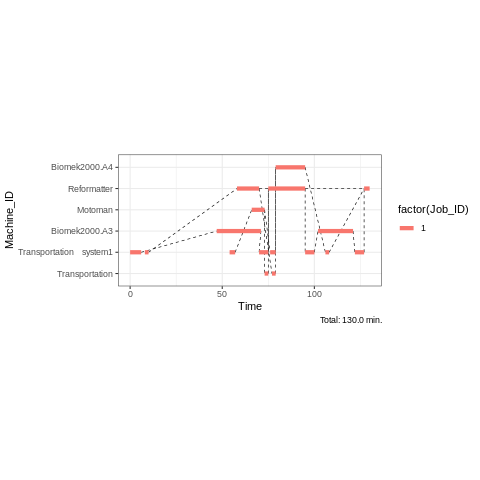

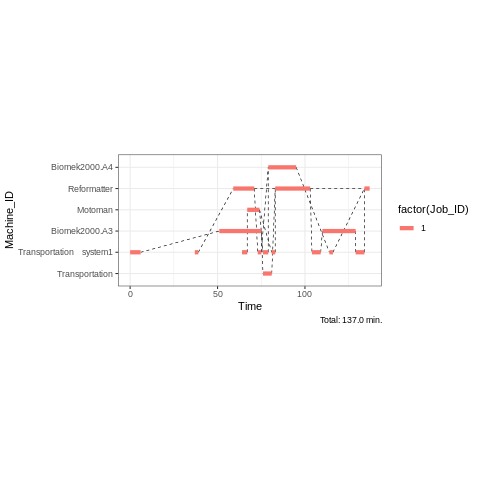

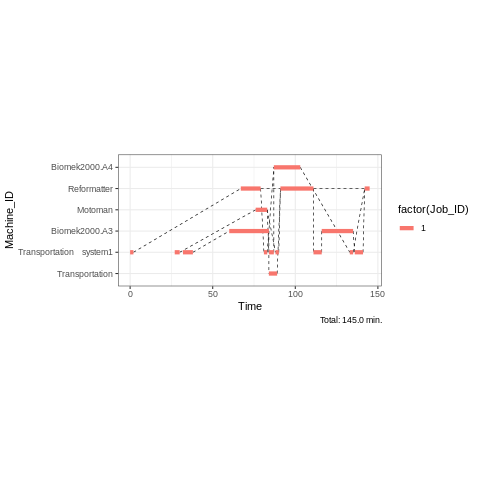

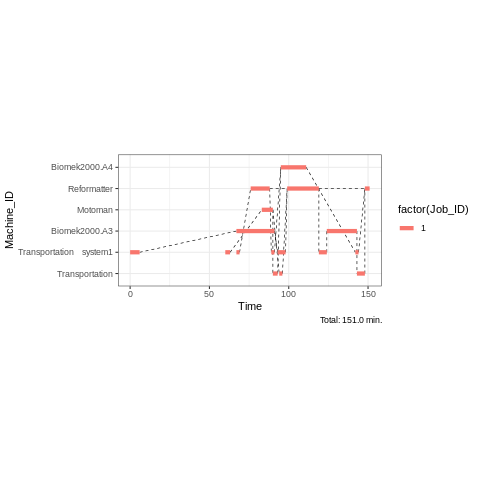

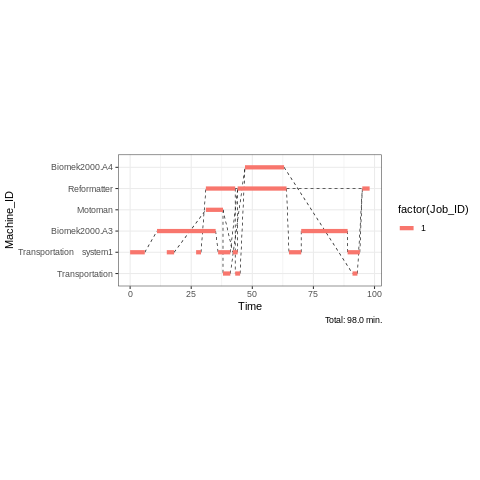

In [130]:
%%R


path<-"/content/drive/MyDrive/Programming/c++/Volatile_Folder/Last_test/"
times = list.files(path=path, pattern="time", all.files=TRUE,
	full.names=TRUE)
deps = list.files(path=path, pattern="dep", all.files=TRUE,
	full.names=TRUE)
machines = list.files(path=path, pattern="machine", all.files=TRUE,
	full.names=TRUE)


                
for (i in 1:length(times)) {              # for (ループ変数 in ベクトルやリスト)
                 # ベクトルやリストの要素が空にならない限り式が繰り返される


# Define path
path_scheduling_result <-times[i]
path_dependency <- deps[i]
path_machine <-machines[i]
path_output_pdf <-  paste0(substr(deps[i], start = 1, stop = nchar(deps[i])-3), "pdf")

# Read data
df1 <- read_tsv(path_scheduling_result)
df_dep <- read_tsv(path_dependency)
df_machine <- read_tsv(path_machine)
print(colnames(df_dep))
print(head(df_machine))
print(head(df1))

# Read data
df1 <- read_tsv(path_scheduling_result)
df_dep <- read_tsv(path_dependency)
df_machine <- read_tsv(path_machine)
colnames(df_dep)

# Preprocess data
df_dep %>%
  left_join(df1, by=c("Job_ID", "Operation_ID_1"="Operation_ID")) %>%
  left_join(df1, by=c("Job_ID", "Operation_ID_2"="Operation_ID")) -> df_dep

# Calculate last end time
last_end_time <- max(df1$End)

# Plot
g <- df1 %>%
  ggplot(aes(x=Start,  y=factor(Machine_ID))) +
  geom_segment(
    data=df_dep,
    aes(x=End.x, xend=Start.y, y=factor(Machine_ID.x), yend=factor(Machine_ID.y)),
    linetype="dashed",
    size=0.3
  ) +
  geom_segment(aes(xend=End, yend=factor(Machine_ID), color = factor(Job_ID)), size = 2) +
  # geom_label(aes(label=Job_ID, x=Start, y=factor(Machine_ID)), hjust = 1, vjust=-0.3, size=2, label.r=unit(0.08, "lines")) +
  theme_bw() +
  scale_y_discrete(
    breaks=factor(df_machine$Machine_ID),
    labels=df_machine$Machine_name,
    limits=rev(factor(unique(df_machine$Machine_ID)))
  ) +
  labs(x="Time", y="Machine_ID", caption=sprintf("Total: %.1f min.", last_end_time)) +
  theme(aspect.ratio = 1/2)

plot(g)

# Save plot
ggsave(filename = path_output_pdf, plot = g, width = 8, height = 4)

 }

